# **Projeto de Disciplina - Validação de modelos de clusterização [22E4_3]**
Nathalia de Almeida Castelo Branco

## **Etapa 01 - Infraestrutura**

In [4]:
# Importação das dependências

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from sklearn.metrics import pairwise_distances_argmin_min

In [5]:
sns.set_palette(['#7DBA91', '#59A590', '#40908E', '#287A8C', '#1C6488'])
sch.set_link_color_palette(['#7DBA91', '#59A590', '#40908E', '#287A8C', '#1C6488'])

## **Etapa 02 - Escolha da base de dados**

1. Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.

**Dicionário de Dados**

| Feature  | Descrição  |
|---|---|
| country       | Nome do país |
| child_mort    | Quantidade de mortes de crianças abaixo de 5 anos a cada mil nascimentos |
| exports       | Exportação de bens e serviços, em percentual do PIB per capita  |
| health        | Total de gastos  com saúde, em percentual do PIB per capita |
| imports       | Importação de bens e serviços, em percentual do PIB per capita  |
| income        | Renda líquida por pessoa  |
| inflation     | Taxa anual de crescimento do PIB  |
| life_expec    | Numéro médio de anos que uma criança recém nascida viveria, mantendo-se os padrões de mortalidade  |
| total_fer     | Número de filhos por mulher, mantendo-se as taxas de fertilidade por idade  |
| gdpp          | PIB per capita: PIB total dividido pela população total  |

In [6]:
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


2. Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.

        A base de dados escolhida foi a base de índices de desenvolvimento por país. O objetivo da escolha destes dados é a continuação do trabalho da disciplina anterior.

3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [10]:
countries = data['country']
economic_indicators = data.drop('country', axis=1)
economic_indicators.set_index(countries, inplace=True)
indicators_names = economic_indicators.columns.values

In [11]:
economic_indicators.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [12]:
# Nomes traduzidos para as faixas dinâmicas
readable_names = ['Mortalidade infantil', 'Exportação (% PIB per capita)', 'Gastos com saúde (% PIB per capita)', 'Importação (% PIB per capita)', 'Renda líquida por pessoa', 'Taxa anual de crescimento do PIB', 'Expectativa de vida', 'Fertilidade', 'PIB per capita']

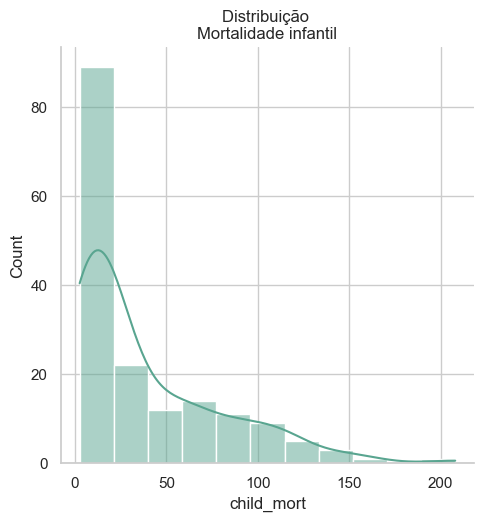

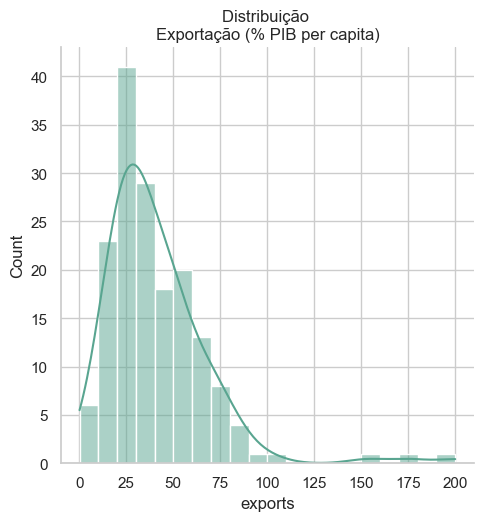

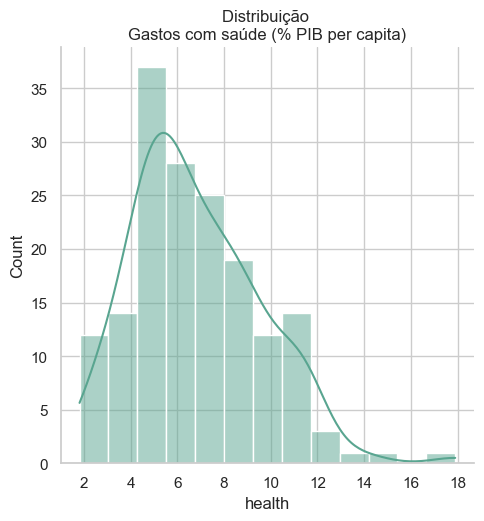

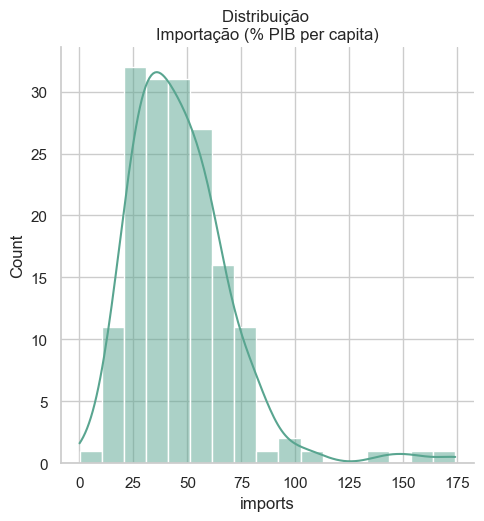

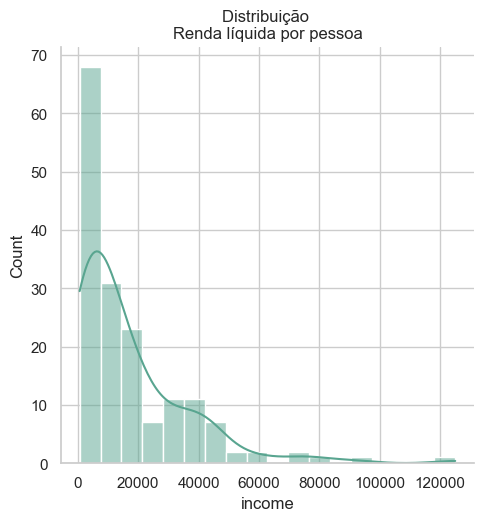

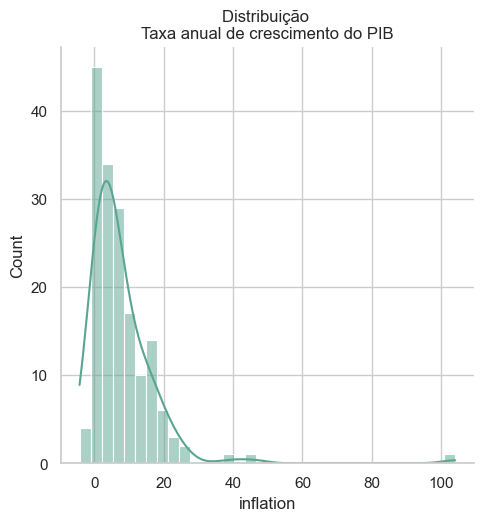

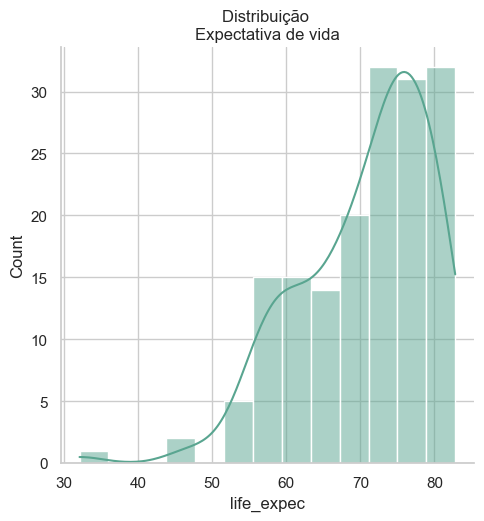

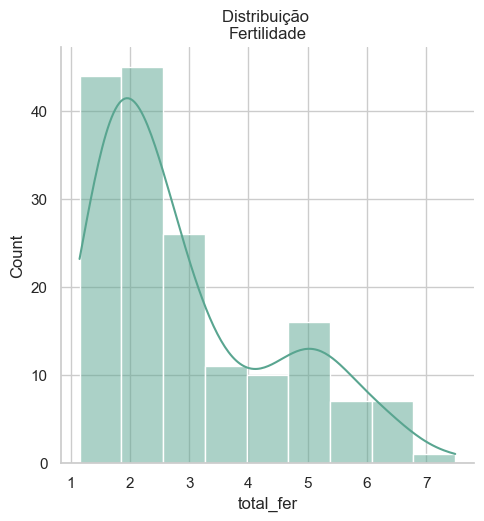

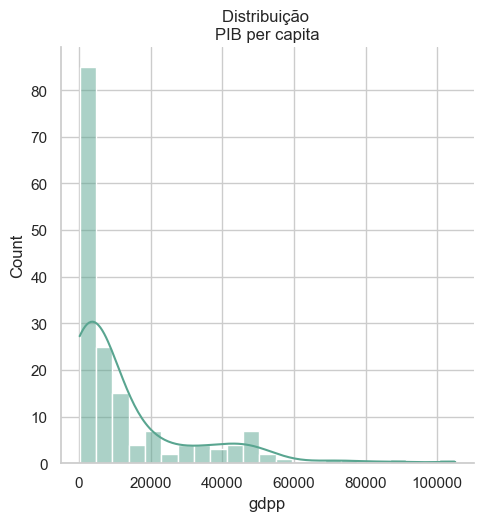

In [14]:
# Faixa dinâmica das variáveis utilizadas na clusterização em gráficos
for i in range(0, len(indicators_names)):

    sns.displot(data=data, x=indicators_names[i], color='#59A590', kde=True).set(title=f'Distribuição \n{readable_names[i]}')

    Antes da etapa de clusterização é necessário realizar o pré-processamento dos dados, onde os mesmos devem ser normalizados e os outliers retirados.

4. Realize o pré-processamento adequado dos dados. Descreva os passos necessários.

## **Etapa 03 - Clusterização**

1. Realizar o agrupamento dos dados, escolhendo o número ótimo de clusters. Para tal, use o índice de silhueta e as técnicas:
* K-Médias
* DBScan

Com os resultados em mão, descreva o processo de mensuração do índice de silhueta. Mostre o gráfico e justifique o número de clusters escolhidos.


2. Compare os dois resultados, aponte as semelhanças e diferenças e interprete.



3. Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos.

4. Realizando a análise, responda: A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan?

## **Etapa 04 - Medidas de similaridade**

1. Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários. 

2. Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.

3. Indique um caso de uso para essa solução projetada.

4. Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.